In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (6,5)


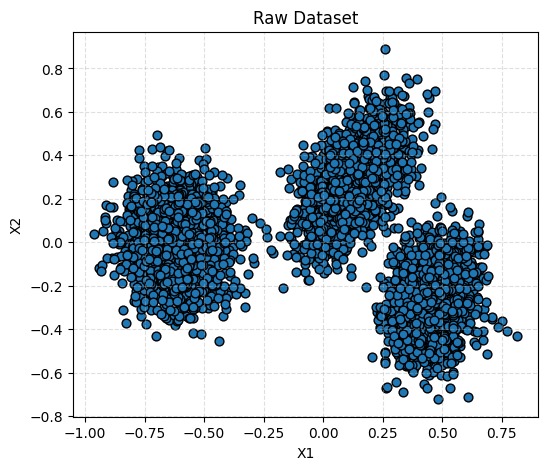

In [17]:
# Load Data & Plot Raw Dataset
X = np.loadtxt("./data/X.dat")

# Plot raw dataset
plt.scatter(X[:,0], X[:,1], s=40, edgecolor='k')
plt.title("Raw Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [18]:
#draw_clusters function
def draw_clusters(X, clusters, centroids, title="Clusters"):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap="tab10", s=40, edgecolor='k')
    plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


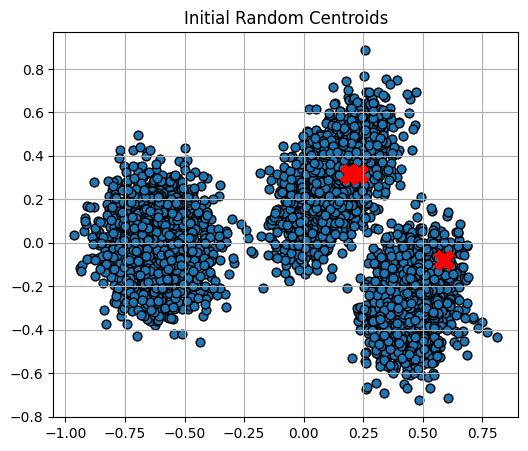

In [19]:
def init_centroids(X, k):
    idx = np.random.choice(X.shape[0], k, replace=False)
    return X[idx]

k = 3  # number of clusters

centroids = init_centroids(X, k)

# Plot initial centroids on dataset
plt.scatter(X[:,0], X[:,1], s=40, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red')
plt.title("Initial Random Centroids")
plt.grid(True)
plt.show()


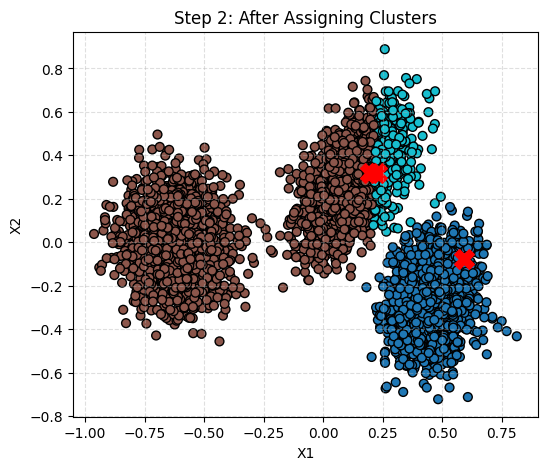

In [20]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
    return np.argmin(distances, axis=1)

clusters = assign_clusters(X, centroids)

draw_clusters(X, clusters, centroids, title="Step 2: After Assigning Clusters")


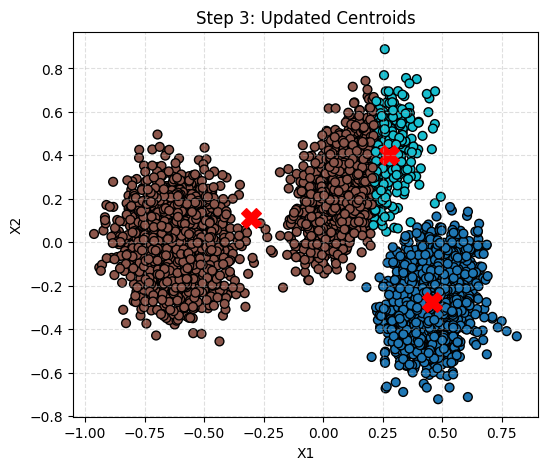

In [21]:
#K-MEANS IMPLEMENTATION
def compute_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        new_centroids.append(X[clusters == i].mean(axis=0))
    return np.array(new_centroids)

new_centroids = compute_centroids(X, clusters, k)

draw_clusters(X, clusters, new_centroids, title="Step 3: Updated Centroids")


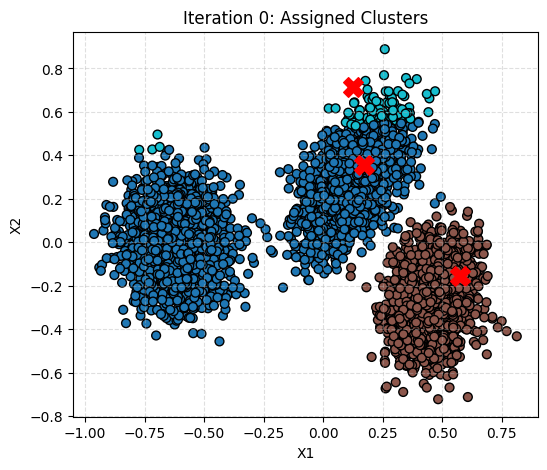

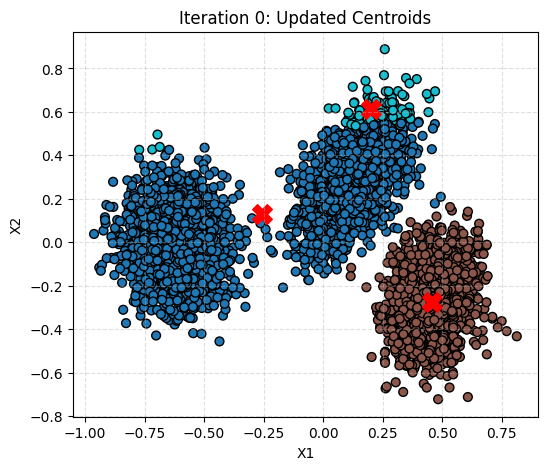

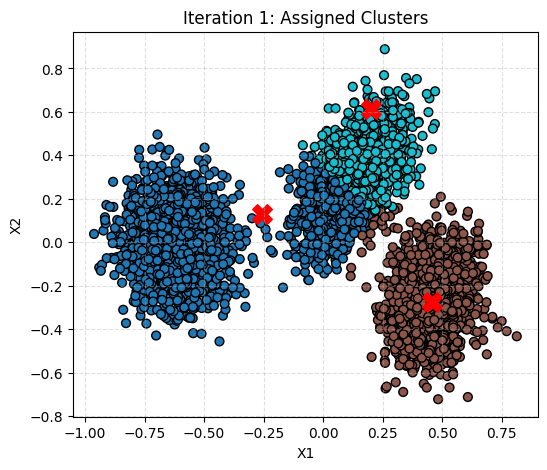

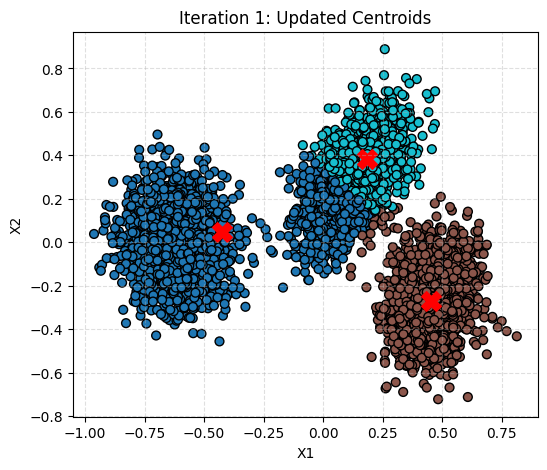

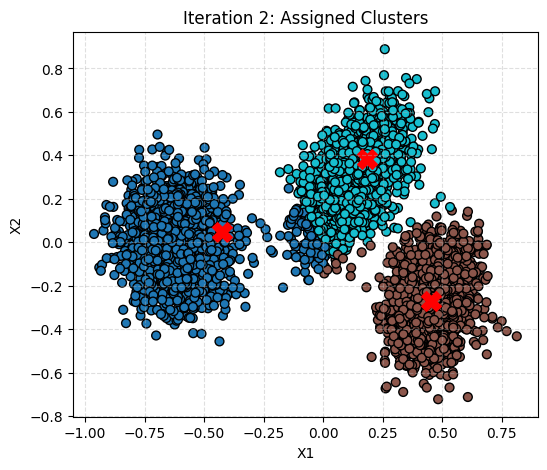

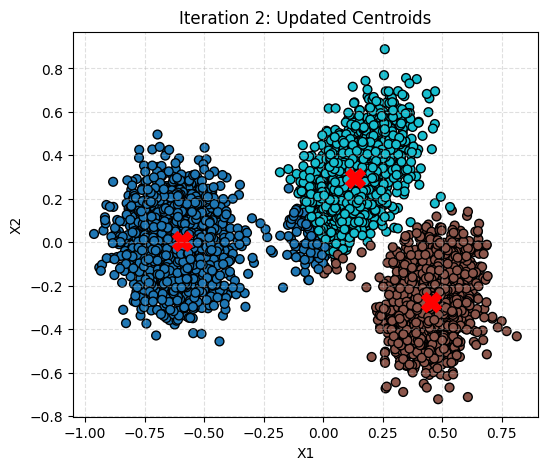

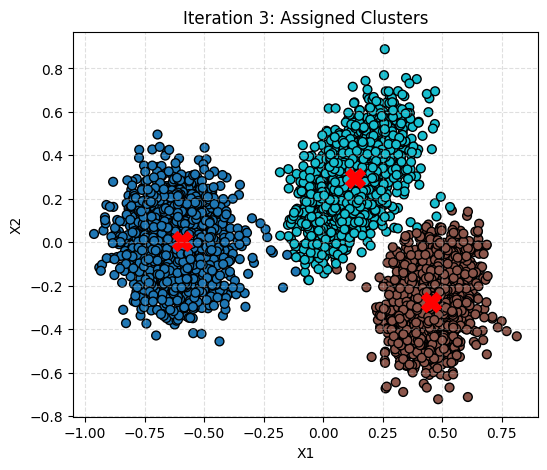

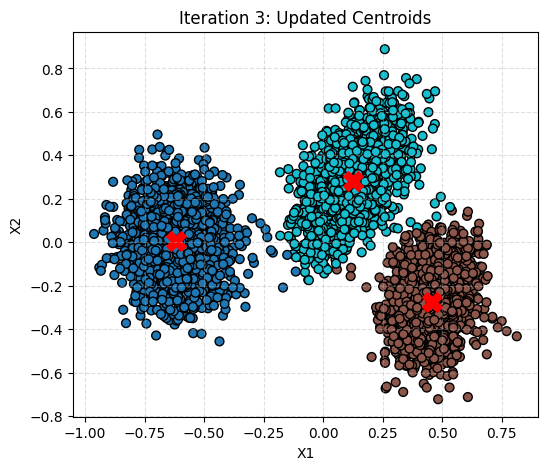

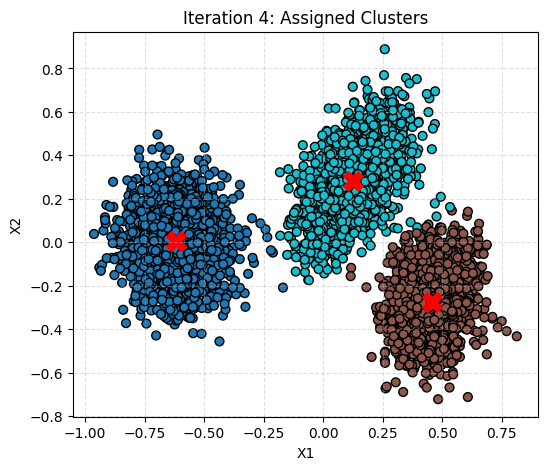

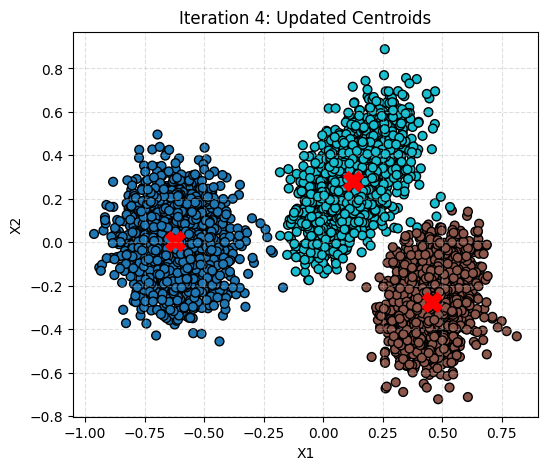

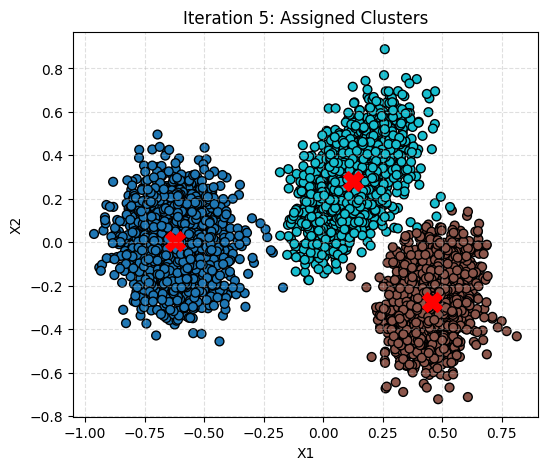

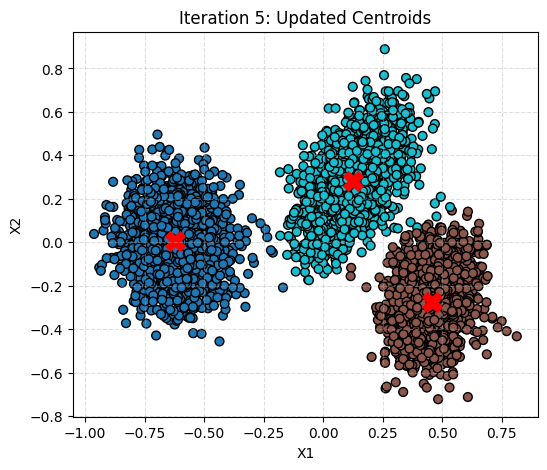

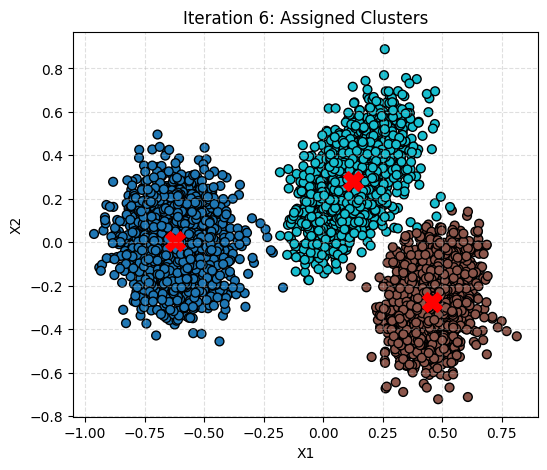

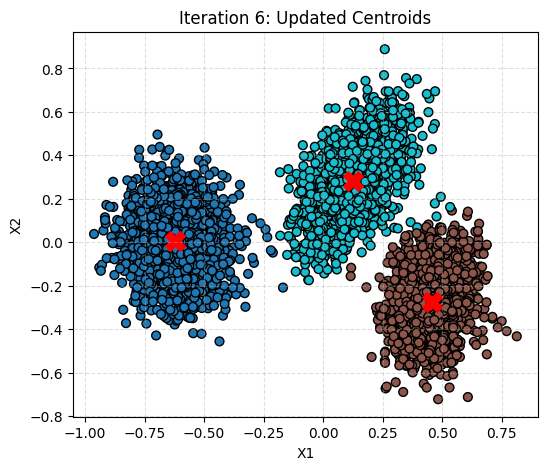

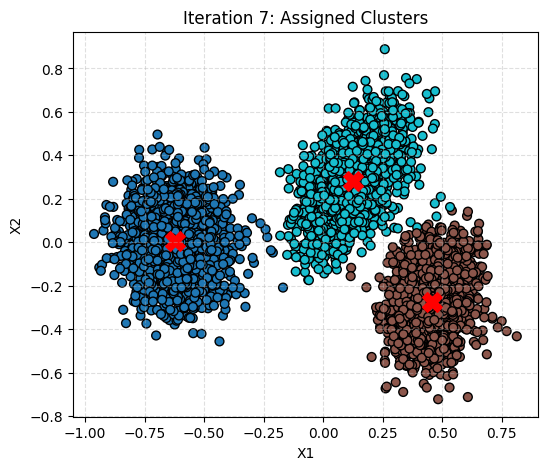

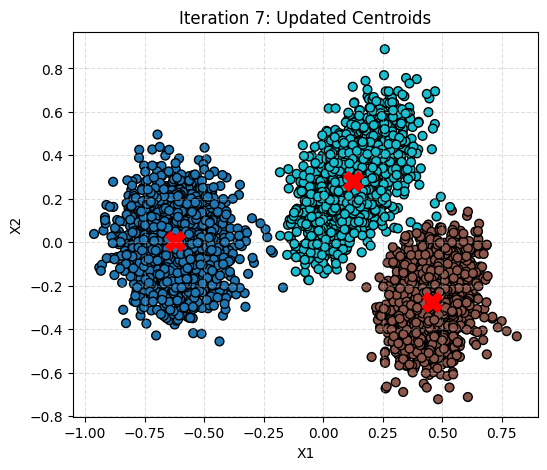

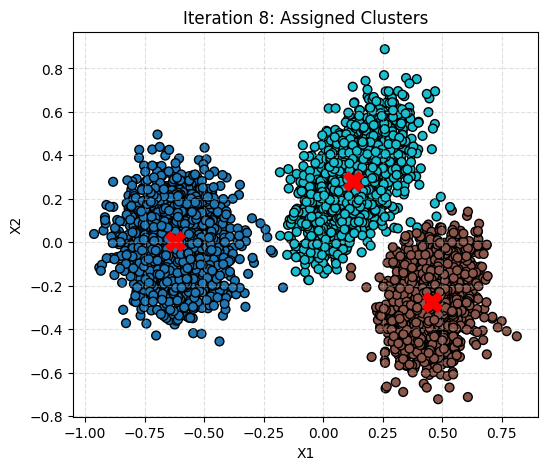

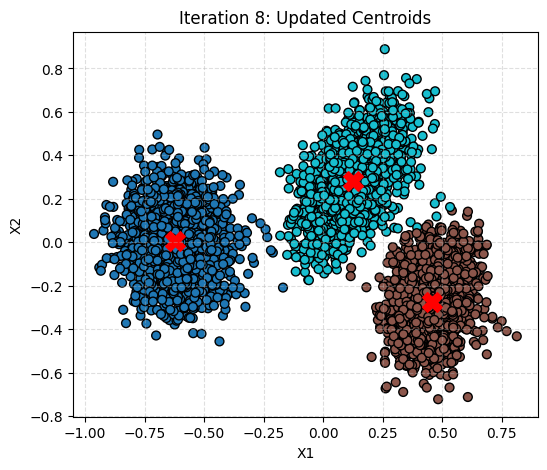

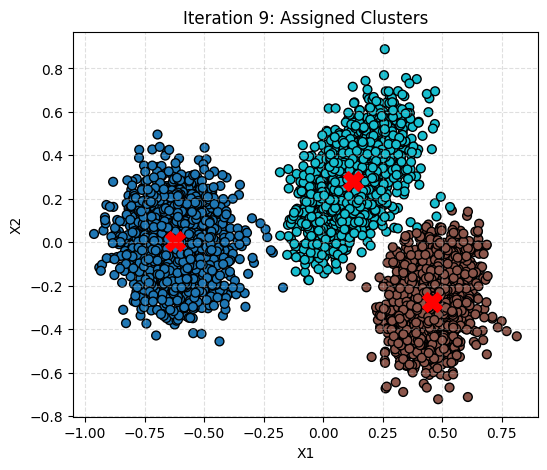

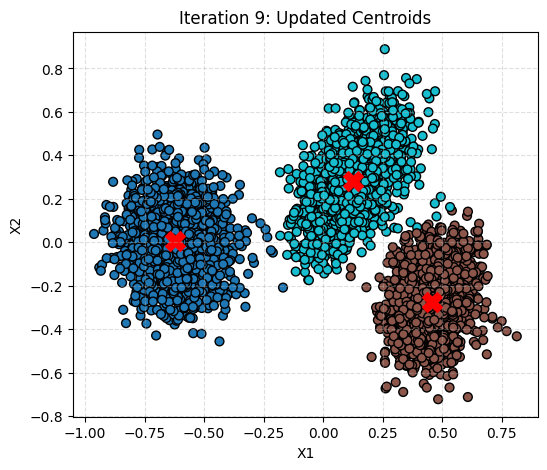

In [22]:
def kmeans(X, k, iterations=4):
    centroids = init_centroids(X, k)

    for it in range(iterations):
        clusters = assign_clusters(X, centroids)
        draw_clusters(X, clusters, centroids, title=f"Iteration {it}: Assigned Clusters")

        centroids = compute_centroids(X, clusters, k)
        draw_clusters(X, clusters, centroids, title=f"Iteration {it}: Updated Centroids")

    return clusters, centroids

clusters, centroids = kmeans(X, k=3, iterations=10)

In [23]:

# Save cluster labels to file
np.savetxt("./output/k3_cluster.txt", clusters, fmt="%d")

print("k3_cluster.txt saved!")

k3_cluster.txt saved!
